In [11]:
from pathlib import Path 
import sys
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.individ_group as ig
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/'
    

## Calculate the individual-group analysis and save as file

In [ ]:
mname = 'Models_03/NettekovenSym32_space-MNISymC2'
info,model = ut.load_batch_best(mname)
Uhat_data,Uhat_complete,Uhat_group = get_individ_group_mdtb(model,atlas='MNISymC2')
D = evaluate_dcbc(Uhat_data,Uhat_complete,Uhat_group,atlas='MNISymC2')

## Load results and plot Figure

In [16]:
fname = base_dir+ '/Models/Evaluation_03/indivgroup_NettekovenSym32.tsv'
D = pd.read_csv(fname,sep='\t')
D

,Unnamed: 0,type,runs,dcbc,subject
0,0,data,1,0.058826,1
1,0,data and group,1,0.017525,1
2,0,data,2,0.051025,1
3,0,data and group,2,0.019384,1
4,0,data,3,0.057762,1
...,...,...,...,...,...
811,0,data and group,15,0.052030,24
812,0,data,16,0.072145,24
813,0,data and group,16,0.056096,24
814,0,group,0,0.106936,24


/Users/jdiedrichsen/opt/miniconda3/lib/python3.8/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)


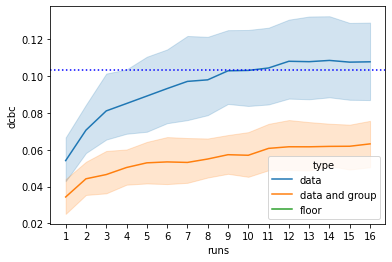

In [17]:
gm = D.dcbc[D.type=='group'].mean()
sb.lineplot(data=D[D.type!='group'],
y='dcbc',x='runs',hue='type',markers=True, dashes=False)
plt.xticks(ticks=np.arange(16)+1)
plt.axhline(gm,color='b',ls=':')
# t.ylim([0.21,0.3])
